In [2]:
library(dplyr)
library(ggplot2)
library(reshape2)

In [3]:
gamingdata = read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

# Below we have 5 questions based on the Data obtained

## 1. Number of people who play video games for Different Age groups based on Sex

### Question - We see the number of people who play video games based on sex and age

### Conclusion - The Distribution of the number of Female gamers are uniform throughout the age group of 20 to 25. The Distribution of the number of Male gamers are concentrated in certain ages - 23 and 24 respecively. This is inferred from the greater number of points for those ages.

In [26]:
n1 <- gamingdata %>% select(psraid,Gamer = game1,age,sex)
n1 <- n1 %>% filter(Gamer %in% c("1","2"),age>19,age<26)
n1 <- n1 %>% mutate(Sex = ifelse(sex == 1, "Male",ifelse(sex == 2, "Female","NA")))

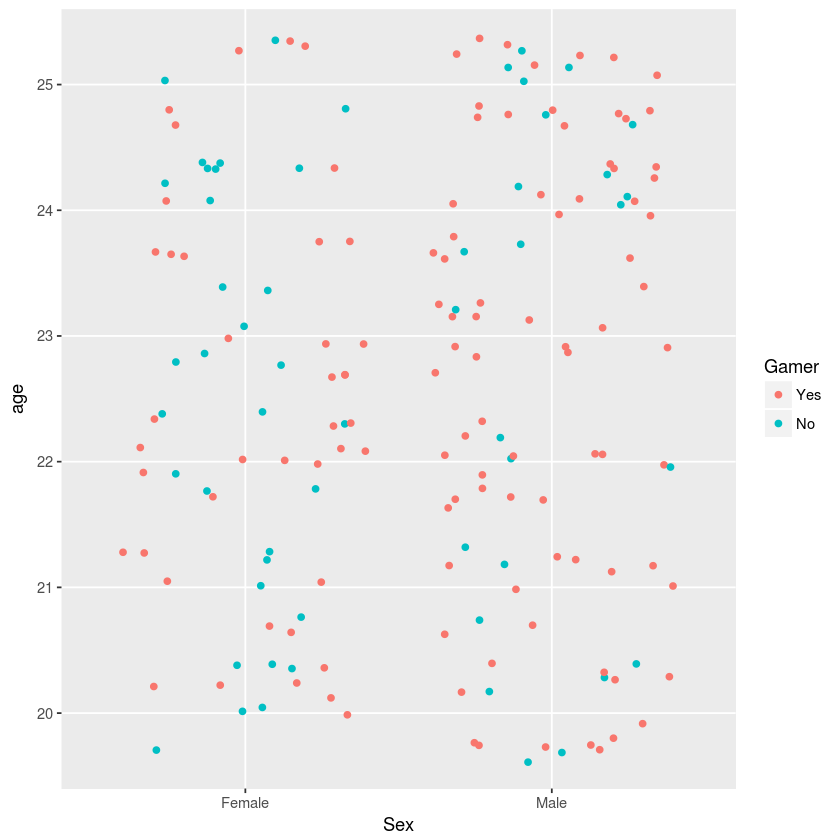

In [27]:
n1 <- within(n1, Gamer <- factor(Gamer, labels = c("Yes", "No")))
n1 <- within(n1, age <- factor(age))
qplot(Sex, age, colour = Gamer, data=n1, geom="jitter")
#qplot(game1, data=n1, geom="bar", facets = . ~ sex, fill=age)

## 2. Income Distribution comaprison between people working in Large Corporations, Govt Employees and Medium Sized Companies

### Question - Which group of people have better earnings when we compare Large Corporations, Govt Sector and Medium Sized Companies 
### Conclusion -  
### For income group 7 and 8, the number of people in Large corporations are remarkably more than people working in Govt sector or medium sized companies. This goes to say that people in Large Corporations are more likely to be in earn more.

### For income group 6, the number of people working in Govt sector is more than the number of people working in Medium sized companies. This is the only income group where this is true. This goes to say that a large number of govt employees have a uniform salary and is at the income group 6.

### Histograms used for the conclusion are given below 

In [177]:
#Employee Type based on income
c1 <- gamingdata %>% select(Income = inc,emptype1)
c2 <- collect(c1 %>% filter(Income != 98,Income != 99,emptype1 == 1))
c3 <- collect(c1 %>% filter(Income,Income != 98,Income != 99,emptype1 == 4))
c4 <- collect(c1 %>% filter(Income != 98,Income != 99,emptype1 == 2))

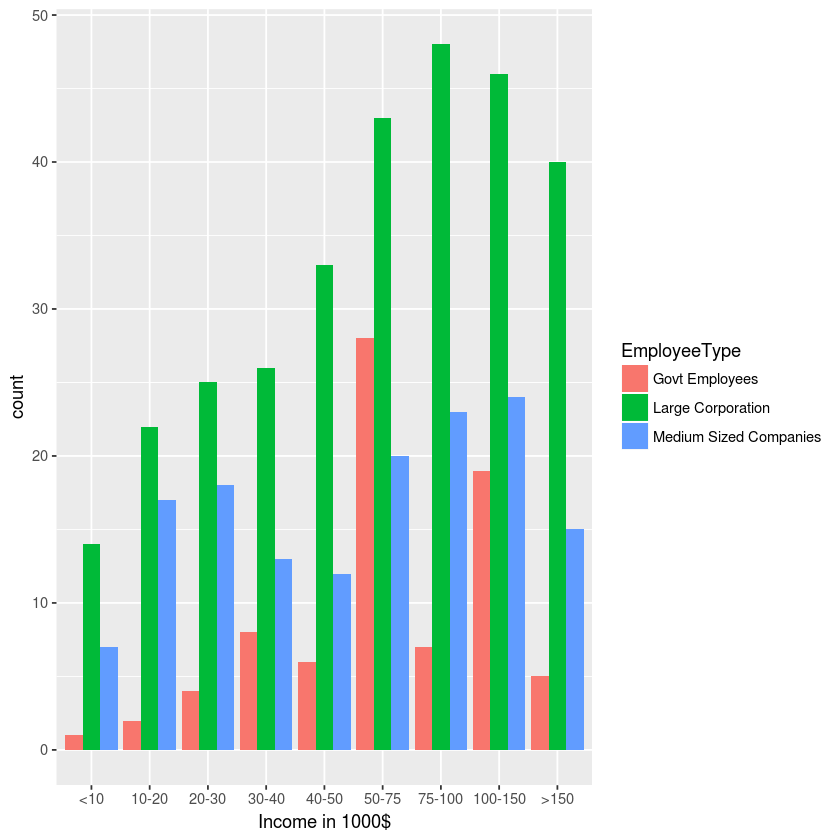

In [203]:
c2$EmployeeType <- 'Large Corporation'
c3$EmployeeType <- 'Govt Employees'
c4$EmployeeType <- 'Medium Sized Companies'
p3 <- rbind(c2,c3,c4)
p3 <- within(p3, Income <- factor(Income, labels = c("<10", "10-20","20-30","30-40","40-50","50-75","75-100","100-150",">150")))
p5 <- ggplot(p3, aes(Income, fill = EmployeeType)) + geom_bar(position = "dodge")
p5 + scale_x_discrete("Income in 1000$")

## 3. Smart phone usage to get jobs based on gender

### Question - What is the distribution of smartphone usage to get jobs based on gender

### Conclusion - 
### We see that for women in income group less than 10000 USD and to an extent income group 50-70000 USD, the number of people using smartphone to get jobs are almost equal to the number of people not using smart phones to get jobs
### For Men in income group 50-70000 USD and income group 75-100000 USD, the number of people using smartphone to get jobs are almost equal to the number of people not using smart phones to get jobs
### For all other income groups for men and women barring the 2 observations made above, the number of people not using smart phones for jobs are relatively more in number than people using smartphones to get jobs

In [200]:
b1 <- gamingdata %>% select(psraid,Smphoneforjob = smjob1,sex,Income = inc)
b1 <- b1 %>% filter(Smphoneforjob != 'NA', Income != 98, Income != 99)
b1 <- b1 %>% mutate(Sex = ifelse(sex == 1, "Male",ifelse(sex == 2, "Female","NA")))

In [206]:
b1 <- within(b1, Smphoneforjob <- factor(Smphoneforjob, labels = c("Yes", "No")))
b1 <- within(b1, Income <- factor(Income, labels = c("<10000$", "10-20000$","20-30000$","30-40000$","40-50000$","50-75000$","75-100000$","100-150000$",">150000$")))

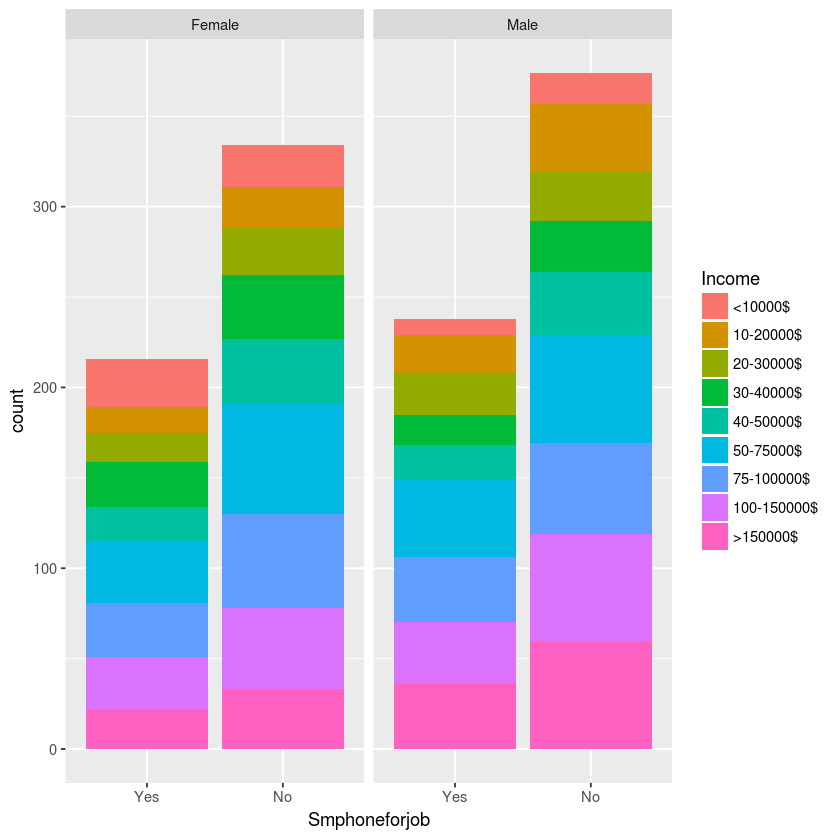

In [207]:
qplot(Smphoneforjob, data=b1, geom="bar", facets = . ~ Sex, fill=Income)

## 4. Number of people who own a smartphone in different employment types
### Question - Here we look at the number of people who are employed in various types who own a smart phone namely - Full Time Employment, Part Time Employment, Retired, Not Employed for Pay
### Conclusion - 
### Here we see that there are almost as many number of retired people owning a smartphone as there are people who do not own a smartphone.
### In all other Employment Types the number of people who own a smartphone is significantly higher than the number of people who d not own them

In [173]:
d1 <- gamingdata %>% select(psraid,Has_smartphone = smart1,emplnw)
d2 <- collect(d1 %>% filter(Has_smartphone %in% c("1","2"),emplnw == 1))
d3 <- collect(d1 %>% filter(Has_smartphone %in% c("1","2"),emplnw == 2))
d4 <- collect(d1 %>% filter(Has_smartphone %in% c("1","2"),emplnw == 3))
d5 <- collect(d1 %>% filter(Has_smartphone %in% c("1","2"),emplnw == 4))

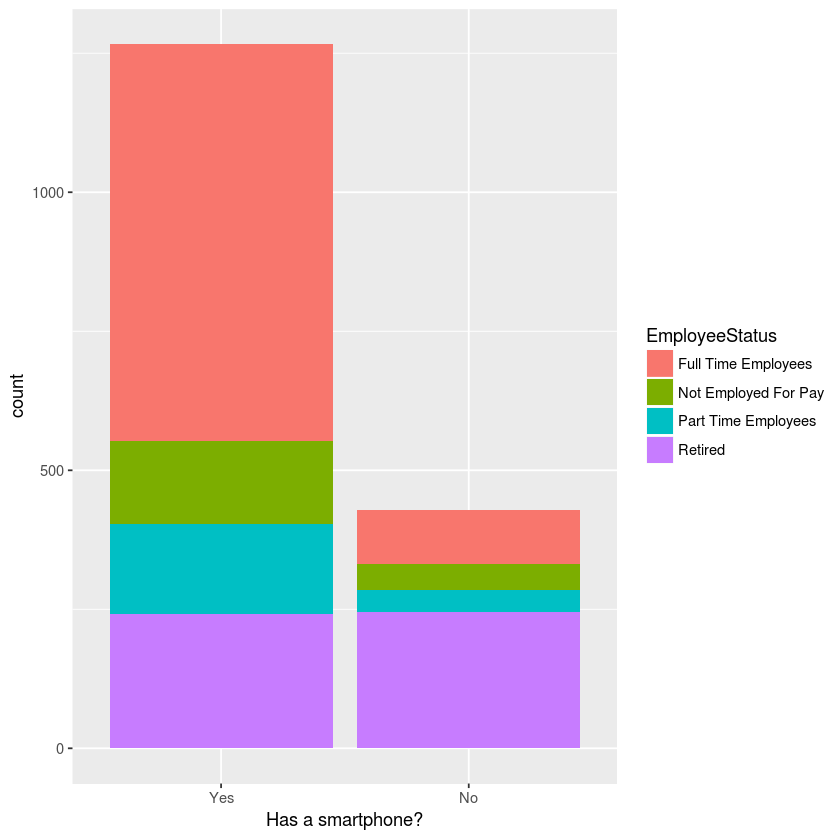

In [174]:
d2$EmployeeStatus <- 'Full Time Employees'
d3$EmployeeStatus <- 'Part Time Employees'
d4$EmployeeStatus <- 'Retired'
d5$EmployeeStatus <- 'Not Employed For Pay'
nm <- rbind(d2,d3,d4,d5)
nm <- within(nm, Has_smartphone <- factor(Has_smartphone, labels = c("Yes", "No")))
nm1 <- ggplot(nm, aes(Has_smartphone, fill = EmployeeStatus)) + geom_bar()
nm1 + scale_x_discrete("Has a smartphone?")

### 5. Distribution of number of people with TV subscription based on age and gender
### Question  - What is the age for both men and women where maximum number of people have a TV Subscription
### Conclusion - Here we can see that people in the age group of 60 to 62 have the maximum number of TV Subscriptions for both men and women. This is inferred from the fact that Desnity curves peak at 60 to 62 for men and women.

In [220]:
h1 <- gamingdata %>% select(psraid,age,cable1,sex)
h1 <- h1 %>% filter(cable1 == 1,age != 98, age != 99)
h2 <- h1 %>% filter(sex == 1)
h3 <- h1 %>% filter(sex == 2)
h2$sex <- 'Male'
h3$sex <- 'Female'
hn <- rbind(h2,h3)

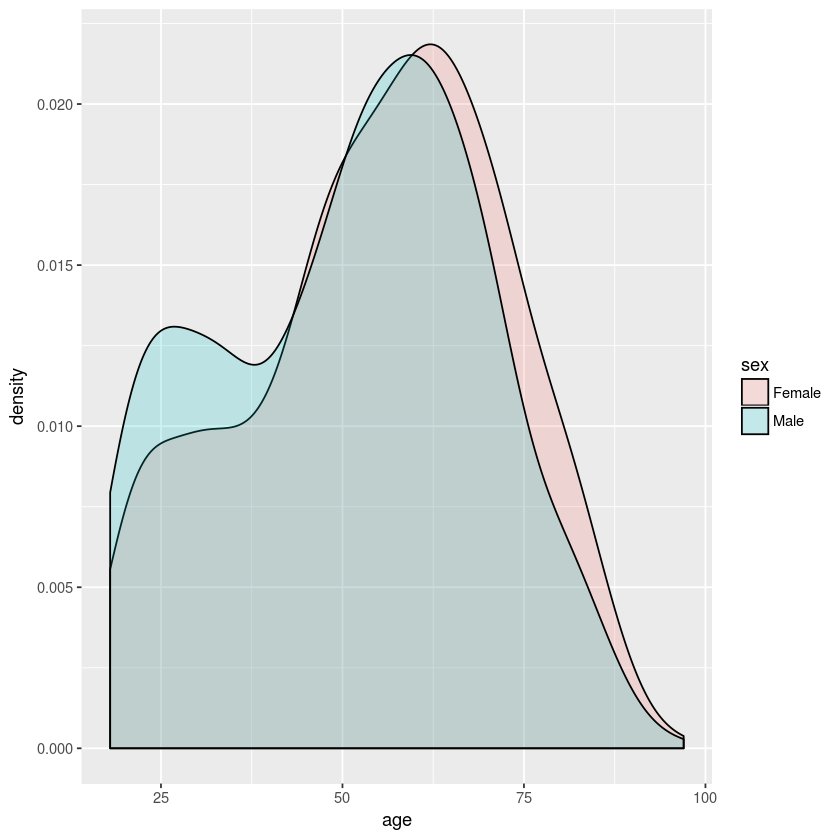

In [221]:
ggplot(hn, aes(age, fill = sex)) + geom_density(alpha = 0.2)